<a href="https://colab.research.google.com/github/LeeSeungwon89/Kaggle_Dacon_Practice/blob/main/1.%20Bike_Sharing_Demand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [44]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 참가한 대회 리스트를 확인합니다.
!kaggle competitions list

In [46]:
!kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
!ls

 bike-sharing-demand.zip   kaggle.json	 sampleSubmission.csv   train.csv
'kaggle (1).json'	   sample_data	 test.csv


In [48]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


# **1. 데이터 준비**

데이터를 준비하겠습니다.

In [49]:
import numpy as np
import pandas as pd
import random

np.random.seed(2022)
random.seed(2022)

# 최대 행렬 수를 설정합니다.
pd.set_option('display.max_column', 50)
pd.set_option('display.max_rows', 50)

# 데이터를 읽습니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

# **2. 데이터 확인**

데이터를 살펴보겠습니다.

## **2.1. 데이터 개요**

훈련 세트를 확인하겠습니다.

In [50]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [52]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


특이사항은 없습니다. 

테스트 세트를 확인하겠습니다.

In [53]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [55]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


훈련 세트와 달리 'casual', 'registered', 'count' 피처가 없습니다. 'count' 피처는 타깃값을 나타냅니다.

## **2.2. 피처 개요**

피처를 하나씩 살펴보겠습니다.

### **2.2.1. 피처 요약**

피처 요약표를 토대로 세부 사항을 확인하겠습니다.

In [56]:
def feature_table(df):
    # 피처 이름과 타입을 출력합니다.     
    feature_description = pd.DataFrame(df.dtypes, columns=['type'])
    feature_description = feature_description.reset_index()
    feature_description = feature_description.rename(columns={'index': 'feature'})
    # 결측치 개수를 산출합니다.
    feature_description['null count'] = df.isnull().sum().values
    # 고윳값 개수를 산출합니다.
    feature_description['eigenvalue count'] = df.nunique().values
    
    # 데이터 크기를 출력합니다.
    print(df.shape)
    
    return feature_description

In [57]:
feature_table(train)

(10886, 12)


,feature,type,null count,eigenvalue count
0,datetime,object,0,10886
1,season,int64,0,4
2,holiday,int64,0,2
3,workingday,int64,0,2
4,weather,int64,0,4
5,temp,float64,0,49
6,atemp,float64,0,60
7,humidity,int64,0,89
8,windspeed,float64,0,28
9,casual,int64,0,309


In [58]:
feature_table(test)

(6493, 9)


,feature,type,null count,eigenvalue count
0,datetime,object,0,6493
1,season,int64,0,4
2,holiday,int64,0,2
3,workingday,int64,0,2
4,weather,int64,0,4
5,temp,float64,0,49
6,atemp,float64,0,65
7,humidity,int64,0,79
8,windspeed,float64,0,27


- 'count' 피처는 타깃값입니다. 모델링을 수행하기 전에 훈련 세트에서 y값으로 분리해야 합니다.

- 결측치는 없습니다.

- 훈련 세트와 달리 테스트 세트에는 'casual', 'registered', 'count' 피처가 없습니다. 추후 모델링을 수행할 때 'casual', 'registered' 피처는 훈련 세트에서 제거해야 합니다.

## **2.3. 시각화를 위한 피처 전처리**

데이터를 시각화하기 전에 전처리를 수행할 피처들을 살펴 보겠습니다.

### **2.3.1. datetime**

'datetime' 피처의 타입은 `object`입니다. 문자열을 나타냅니다. 

In [59]:
train['datetime'][0]

'2011-01-01 00:00:00'

문자열은 시각화에 효율적으로 적용할 수 없습니다. 연, 월, 일, 시, 분, 초로 나누어 각 요소마다 새로운 피처를 생성해야 합니다. 이 과정을 수행하겠습니다.

In [60]:
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [61]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,00


추가로 요일 피처도 생성해 보겠습니다.

In [62]:
from datetime import datetime
import calendar

# 날짜만 추출합니다.
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

# 날짜에 해당하는 숫자를 추출하여 요일명으로 치환합니다.
train['day_of_week'] = train['date'].apply(lambda x: calendar.day_name
                                           [datetime.strptime(x, '%Y-%m-%d').weekday()])

train['day_of_week'].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day_of_week, dtype: int64

### **2.3.2. season**

'season' 피처는 정수로 구성된 명목형 피처입니다. 

- 1: spring

- 2: summer

- 3: fall

- 4: winter 

In [63]:
train['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

그대로 사용해도 괜찮지만 구분하기 쉽도록 각 값에 해당하는 계절로 치환하겠습니다.

In [64]:
train['season'] = train['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

train['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

### **2.3.3. holiday**

'holiday' 피처는 정수로 구성된 명목형 피처입니다.

- 0: 공휴일 아님

- 1: 공휴일

범주가 적으므로 구분하기 쉽습니다. 그대로 사용하겠습니다.

### **2.3.4. workingday**

'workingday' 피처는 정수로 구성된 명목형 피처입니다.

- 0: 근로일 아님

- 1: 근로일

범주가 적으므로 구분하기 쉽습니다. 그대로 사용하겠습니다.

### **2.3.5. weather**

'weather' 피처는 정수로 구성된 명목형 피처입니다.

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [65]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

구분하기 쉽도록 각 값에 해당하는 날씨로 치환하겠습니다.

In [66]:
train['weather'] = train['weather'].map({
    1: 'clear',
    2: 'mist',
    3: 'light',
    4: 'bad'
})

train['weather'].value_counts()

clear    7192
mist     2834
light     859
bad         1
Name: weather, dtype: int64

특이사항이라면 'bad' 값에 속하는 데이터가 1개 존재합니다. 'bad' 값이 포함된 레코드(행)를 확인해 보겠습니다.

In [67]:
train[train['weather']=='bad']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,date,day_of_week
5631,2012-01-09 18:00:00,spring,0,1,bad,8.2,11.365,86,6.0032,6,158,164,2012,01,09,18,00,00,2012-01-09,Monday


공휴일이 아닌 근무일 오후 6시에 대여됐습니다. 오류치인지 확인할 방법은 마땅치 않아 보입니다. 추후 데이터 전처리 과정에서 레코드 자체를 제거하여 모델 성능을 제고할 수 있을 것으로 판단합니다.

### **2.3.6. temp**

'temp'는 연속형 피처이며, 실제 온도를 의미합니다. 전처리를 수행할 필요가 없습니다.

In [68]:
train['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

### **2.3.7. atemp**

'atemp'는 연속형 피처이며, 체감 온도를 의미합니다. 전처리를 수행할 필요가 없습니다.

In [69]:
train['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

### **2.3.8. humiduty**

'humidity'는 이산형 피처이며, 상대 습도를 의미합니다. 전처리를 수행할 필요가 없습니다.

In [70]:
train['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

### **2.3.9. windspeed**

'windspeed'는 연속형 피처이며, 풍속을 의미합니다. 전처리를 수행할 필요가 없습니다.

In [71]:
train['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

### **2.3.10. count**

'count'는 이산형 피처이며, 자전거 대여 대수를 의미하는 타깃값입니다. 전처리를 수행할 필요가 없습니다.

In [72]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

### **2.3.11. 불필요한 피처 제거**

분석에 불필요한 피처는 삭제하겠습니다.

In [88]:
train.drop(['datetime', 'date'], axis=1, inplace=True)

# **3. 데이터 시각화**

In [73]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=20)
plt.style.use('seaborn')

피처순으로 시각화를 수행하겠습니다. 다만 타깃값을 가진 'count' 피처를 기준으로 모든 피처에 시각화를 적용해 볼 예정이므로 먼저 'count' 피처부터 히스토그램으로 시각화해 보겠습니다.

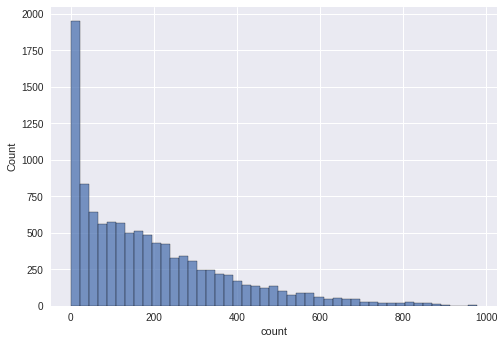

In [74]:
sns.histplot(train['count'])

분포가 왼쪽으로 편향된 비대칭 분포 형태를 보입니다. 회귀 모델에 적용하기 위해 로그 변환을 수행하여 정규분포 형태로 변환할 필요가 있습니다.

로그 변환을 수행하여 시각화해 보겠습니다.

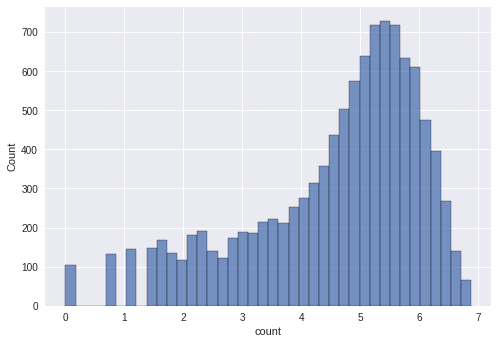

In [75]:
sns.histplot(np.log(train['count']))

기존보다 정규분포 형태로 변화했습니다.

'season', 'count' 피처의 관계를 파악해 보겠습니다.

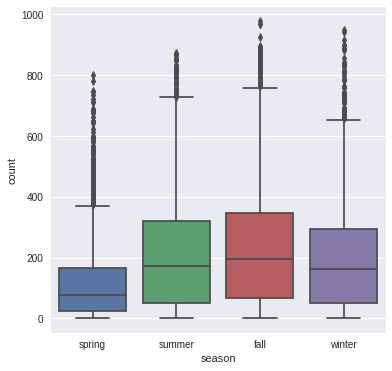

In [76]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='season', y='count', data=train)

자전거 대여 대수(이하 '대여 대수')는 봄이 가장 적고 가을이 가장 많습니다. 이상치는 모든 계절에서 확인됩니다.

'holiday', 'count' 피처의 관계를 파악해 보겠습니다.

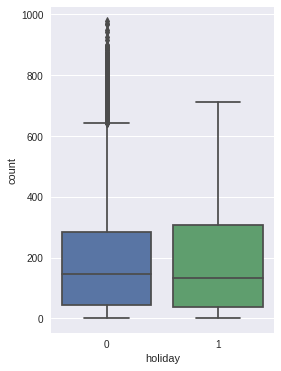

In [77]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='holiday', y='count', data=train)

공휴일이 아닐 때 대여 대수가 더 적고 많은 이상치가 존재합니다. 반면 공휴일일 때는 이상치가 존재하지 않습니다. 중앙값은 큰 차이가 없습니다.

'workingday', 'count' 피처의 관계를 파악해 보겠습니다.

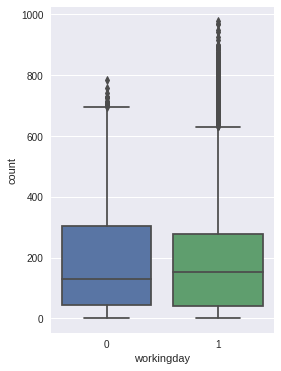

In [78]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='workingday', y='count', data=train)

휴무일일 때 대여 대수가 더 많습니다. 다만 근무일일 때 많은 이상치가 확인됩니다.

'weather', 'count' 피처의 관계를 파악해 보겠습니다.

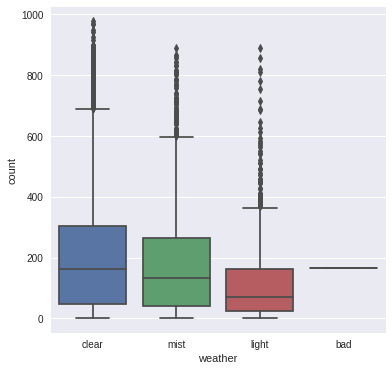

In [79]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='weather', y='count', data=train)

명확한 결과를 보여줍니다. 날씨가 좋을수록 대여 대수가 많습니다.

'temp', 'atemp', 'humidity', 'windspeed' 피처와 'count' 피처의 관계를 파악해 보겠습니다. 네 피처는 모두 수치형 데이터입니다. 산점도 그래프를 한 공간에 나누어 그리겠습니다.

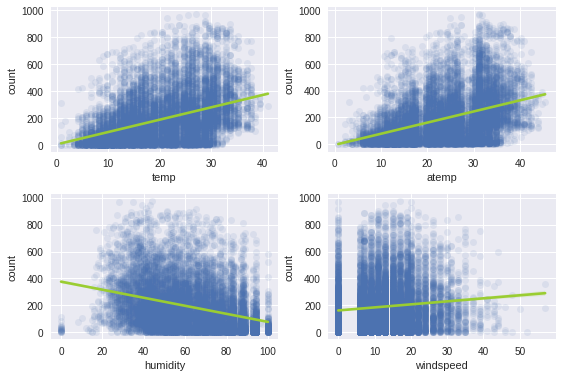

In [80]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() # 그래프 간격을 늘립니다.

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], scatter_kws={'alpha': 0.1},
            line_kws={'color': 'yellowgreen'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], scatter_kws={'alpha': 0.1},
            line_kws={'color': 'yellowgreen'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 0], scatter_kws={'alpha': 0.1},
            line_kws={'color': 'yellowgreen'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 1], scatter_kws={'alpha': 0.1},
            line_kws={'color': 'yellowgreen'})

- 'temp', 'atemp' 피처는 비슷한 형태를 보입니다. 온도가 높을수록 대여 대수가 많습니다.

- 'humidity' 피처의 경우 습도가 낮을수록 대여 대수가 많습니다.

- 'windspeed' 피처의 경우 풍속이 높을수록 대여 대수가 많습니다. 풍속이 높을수록 대여 대수가 적을 것이라는 상식적 가정과 배치되는 결과입니다. 그래프를 자세히 살펴보면 풍속이 0인 값이 많이 분포되어 있습니다. 물론 풍속은 0일수도 있습니다. 그러나 풍속이 약 5이하인 값은 텅 비어있습니다. 값이 빈 다른 구간도 보입니다. 잘못된 데이터로 구성되었을 가능성을 배제할 수 없습니다.

날짜 피처들 중 'hour' 피처와 'count' 피처의 관계를 파악해 보겠습니다. 다른 피처를 범례로 활용하겠습니다. 그래프 6개를 3개씩 나누어 한 공간에 그리겠습니다.

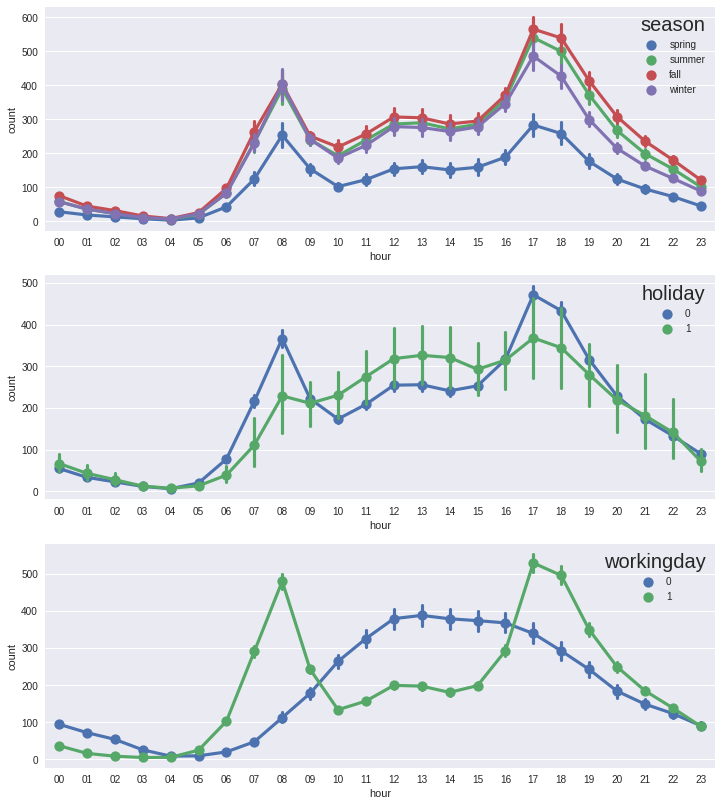

In [81]:
figure, axes = plt.subplots(nrows=3)
figure.set_size_inches(12, 14)

sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[2])

- 'season' 피처의 경우 계절에 따른 대여 대수는 가을에 가장 많고 봄에 가장 적습니다. 모든 계절은 시간대에 따라 비슷한 패턴을 보입니다. 특정 오전 시간대와 오후 시간대에 대여 대수가 많습니다.

- 'holiday' 피처의 경우 'workingday' 피처와 밀접한 연관성을 보입니다. 공휴일일이 아니고 근무일일 때 대여 대수 패턴이 비슷합니다. 반대로 공휴일이고 근무일이 아닐 때 대여 대수 패턴이 비슷합니다. 출퇴근 및 등하교 시간대에 대여 대수가 많고, 휴무일일 때는 특정 오후 시간대에 대여 대수가 많습니다.

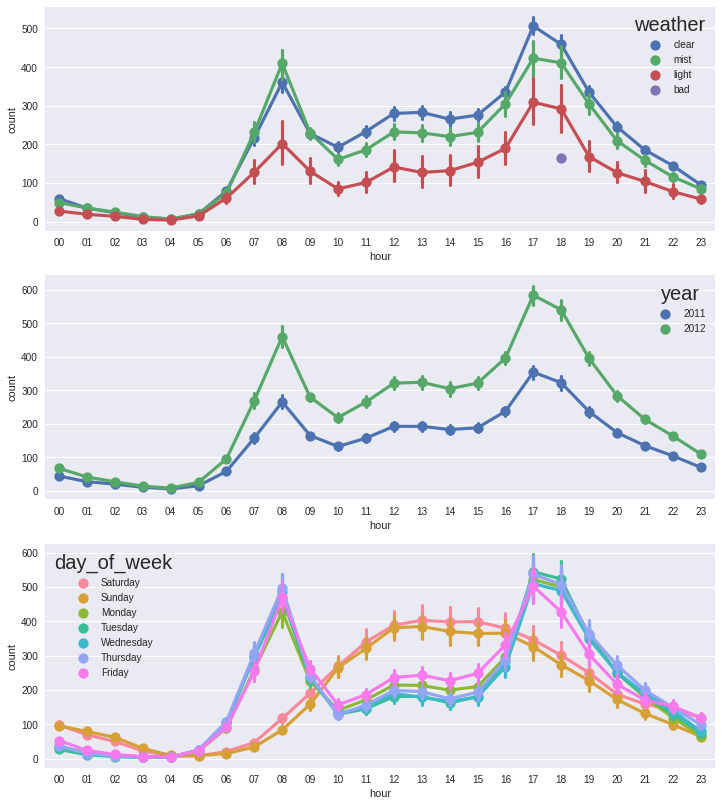

In [82]:
figure, axes = plt.subplots(nrows=3)
figure.set_size_inches(12, 14)

sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='year', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='day_of_week', ax=axes[2])

- 'weather' 피처의 경우 날씨가 좋을수록 대여 대수가 많습니다. 다만 날씨가 가장 좋지 않을 때 이상치 하나가 확인됩니다. 잘못된 데이터일 가능성을 배제할 순 없지만 단정할 근거는 없습니다. 정상 데이터일 수도 있습니다. 오류 여부와 별개로 레코드 자체를 제거하여 모델 성능을 제고할 수 있습니다.

- 'year' 피처의 경우 2012년도 대여 대수가 전년도 대여 대수보다 많습니다. 어떤 이유로 대여 대수가 증가했는지는 알 수 없습니다.

- 'day_of_week'의 경우 평일에 자전거 대여 대수가 많습니다. 이 그래프는 'workingday'로 그린 그래프와 매우 유사한 패턴을 보입니다.

마지막으로 모든 날짜별 'count' 피처의 관계를 파악해 보겠습니다.

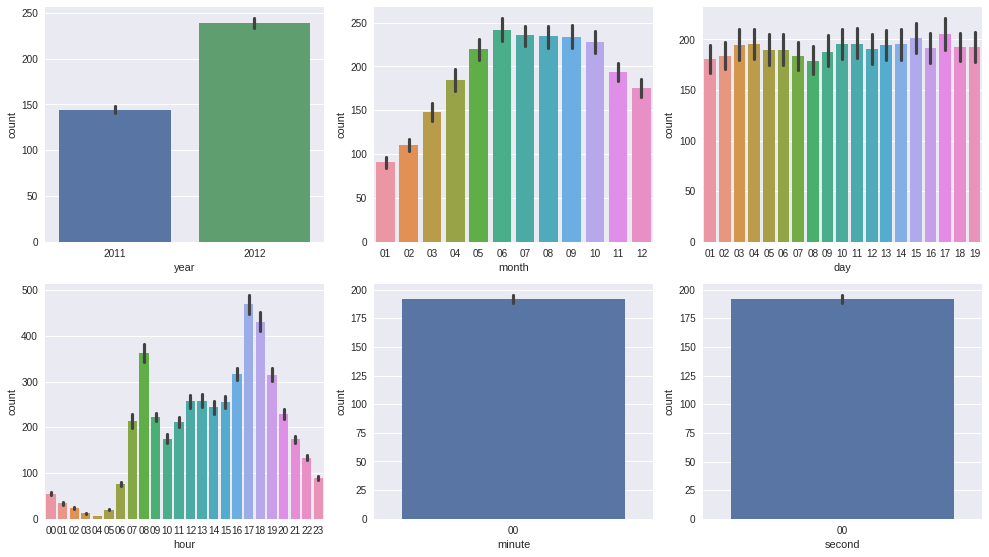

In [104]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(14, 8)
plt.tight_layout()

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[0, 2])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='minute', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='second', y='count', data=train, ax=axes[1, 2])

- 'year' 피처의 경우 11년도보다 12년도에 대여 대수가 많습니다. 명확한 이유는 알 수 없습니다.

- 'month' 피처의 경우 따듯한 계절일수록 대여 대수가 많습니다.

- 'day' 피처의 경우 큰 차이를 파악하기 어려울 정도로 비슷한 대여 대수를 나타냅니다. 아울러 대회 사이트에서 확인한 바에 따르면 훈련 세트와 달리 테스트 세트에는 20일 ~ 월말일까지의 일자만 존재합니다. 피처 자체를 제거하는 편이 옳습니다. 

- 'hour' 피처의 경우 오전 특정 시간대와 오후 특정 시간대에 대여 대수가 많습니다. 출퇴근 및 등하교 시간대에 대여 대수가 많은 것으로 추정할 수 있습니다.

- 'minute', 'second' 피처의 경우 모든 값이 0이므로 유의미한 특징이 없습니다. 피처 자체를 제거하는 편이 옳습니다.

# **4. 피처 상관관계**



---

업데이트 중

---



# **5. 결론**

글로 정리하기 전 메모

'count' 피처: 로그 변환 후 정규분포

'datetime' 피처: 연, 월, 일, 시, 분, 초로 피처 분할

'windspeed' 피처: 결측치 또는 오류치 존재 가능성

'weather' 피처: 'bad' 값을 포함한 레코드 삭제 여부 고려

'day', 'minute', 'second' 피처: 삭제